In [26]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Function

In [27]:
def copy_image_to_new_folder(images, list_name, folder_name):
    '''
    This function copies images from one folder to a new folder that is created in this function.

    Parameter: 
        images - list of images
        list_name - name of the new folder
        folder_name - name of the folder you want to copy the images from
        
    Returns: newly created folders with copied images
    '''
    
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [3]:
def plot_ages(df):
    '''
    This function takes in dataframe and plots histogram of the age range.

    Parameter: dataframe of the label with AgeRange

    returns: plots histogram of the AgeRange
    '''
    
    fig, ax = plt.subplots(figsize=(15,10))
    df['AgeRange'].sort_values().hist(bins='auto', edgecolor='black')
    ax.grid(False)
    ax.set_xlabel('Age')
    ax.set_ylabel('Counts');

To download the images, we go to https://susanqq.github.io/UTKFace/ this website. From the website, download the three folders (part1, part2, part3) and unzip them.
I put the three folders in a folder called 'Human_Face_Regonition_Images' and will be working in that folder to process these images.

When the images were downloaded, there was a file that wasn't a .jpg file. Hence, we will delete the file named '.DS_store'

In [52]:
!find . -name ".DS_Store" -delete

Access denied - .
File not found - -NAME
File not found - -DELETE


First, we are going to make directories for the folders with the images that we downloaded.

In [53]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_2_dir = os.path.join(img_dir, 'part2')
part_3_dir = os.path.join(img_dir, 'part3')

Let's check if the paths were created correctly.

In [54]:
part_1_dir

'Human_Face_Regonition_Images\\part1'

With the directories, we want to make our images be in one folder. 
To do so, we must make a directory of the new folder we want the images to be in.

In [ ]:
img_dir = 'Human_Face_Regonition_Images\\images\\'
os.mkdir(img_dir)

Then, we must get all the files ending with .jpg from each folders (part1, part2, part3) and copy them to the new folder using the directory path we created above.

In the folder part3, we found that there are two images with the wrong extensions. So, before we move the images in part3 folder to the new folder, we need to rename the images first.

In [ ]:
imgs_1= [file for file in os.listdir(part_1_dir) if file.endswith('.jpg')]

for img in imgs_1:
    origin = os.path.join(part_1_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

imgs_2= [file for file in os.listdir(part_2_dir) if file.endswith('.jpg')]

for img in imgs_2:
    origin = os.path.join(part_2_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

os.rename(part_3_dir+'\\'+'44_1_4_20170116235150272.pg', part_3_dir+'\\'+'44_1_4_20170116235150272.jpg')
os.rename(part_3_dir+'\\'+'55_0_0_20170116232725357jpg', part_3_dir+'\\'+'55_0_0_20170116232725357.jpg')

imgs_3= [file for file in os.listdir(part_3_dir) if file.endswith('.jpg')]

for img in imgs_3:
    origin = os.path.join(part_3_dir, img)
    destination = os.path.join(img_dir, img)
    shutil.copyfile(origin, destination)

Let's check if the number of images in the new folder matches the sum of the numbers of the three folders.

In [ ]:
len(os.listdir(img_dir)) == len(os.listdir(part_1_dir)) + len(os.listdir(part_2_dir)) + len(os.listdir(part_3_dir))

Let's visualize some images in our folder.

In [ ]:
imgs = [mpimg.imread(img_dir+img) for img in random.sample(img_dir,5)]

for n in range(5):
    plt.imshow(imgs[n])
    plt.show()

We can create a dataframe of the ages to understand the distributions of the ages in our data.

In [4]:
img_dir = 'Human_Face_Regonition_Images\\images\\'
ages = [name.split('_')[0] for name in os.listdir(img_dir)]
labels = pd.DataFrame({'age' : ages})
labels.head()

,age
0,100
1,100
2,100
3,100
4,100


In [5]:
labels['age'] = labels['age'].astype(int)

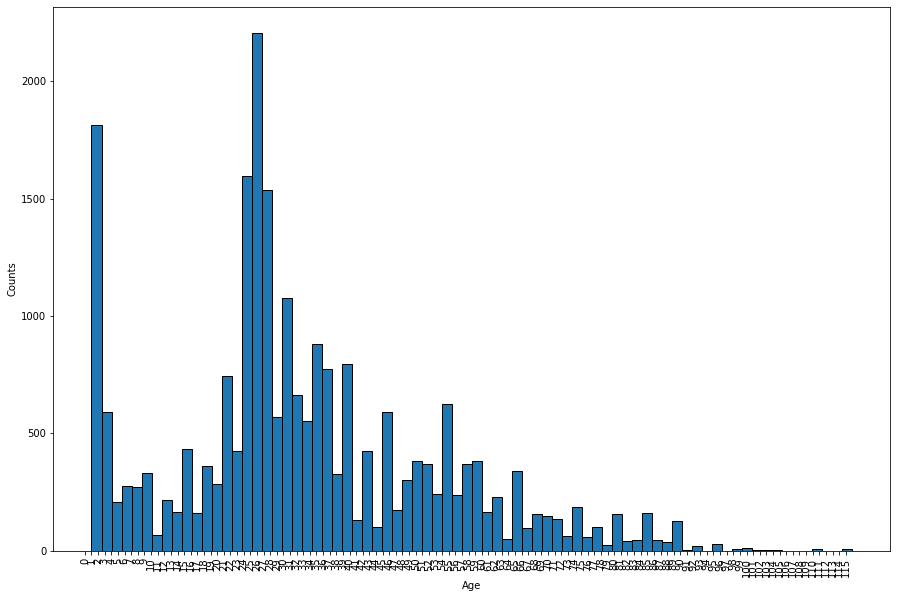

In [6]:
labels = labels.sort_values(by='age')
fig, ax = plt.subplots(figsize=(15,10))
labels['age'].hist(bins='auto', edgecolor='black')
ax.xaxis.set_ticks(np.arange(0, 116, 1))
ax.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.xticks(rotation = 90);

From the graph above, we can see that the distribution of ages are very imbalanced and skewed. 

Let's see how the distribution of the images are when we binned them in certain way.

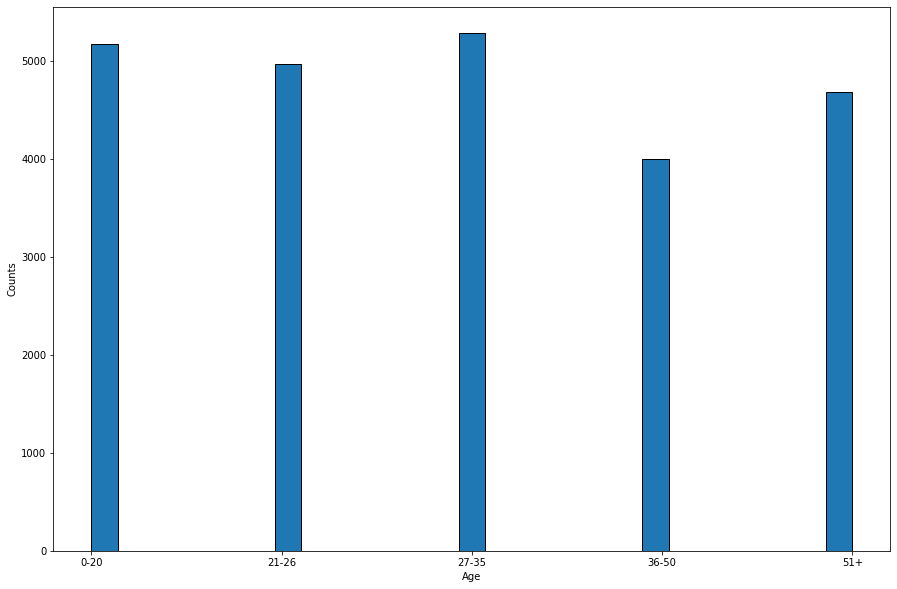

In [8]:
bins = [0, 20, 26, 35, 50, np.inf]
names = ['0-20', '21-26', '27-35', '36-50', '51+']
labels['AgeRange'] = pd.cut(labels['age'], bins, labels=names)

fig, ax = plt.subplots(figsize=(15,10))
labels['AgeRange'].sort_values().hist(bins='auto', edgecolor='black')
ax.grid(False)
ax.set_xlabel('Age')
ax.set_ylabel('Counts');

From the folders with all the images, we want to split out images to 3 different folders for modeling: train, validation, test.

In [9]:
img_dir = 'Human_Face_Regonition_Images\\'

# Split Folder
split_dir = os.path.join(img_dir, 'split3')
os.mkdir(split_dir)

# Train Folder
train_dir = os.path.join(split_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(split_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(split_dir, 'test')
os.mkdir(test_dir)

We want to take 16,000 images into train folder, 5,000 images to validation folder, and 3,108 images to test folder. Because of the way how this file name is, we want to take random images.

In [10]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 16000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [11]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 5000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [12]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

With the three folders, I want to get the correct labels for each folder. To get the labels, I need to get the first digit of each image file. Then, I am going to make them into a dataframe.

In [13]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

train_labels.head()

,age
0,16
1,24
2,35
3,18
4,23


In [14]:
bins = [0, 20, 26, 35, 50, np.inf]
names = ['0-20', '21-26', '27-35', '36-50', '51+']

In [15]:
train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)
train_labels.head()

,age,AgeRange
0,16,0-20
1,24,21-26
2,35,27-35
3,18,0-20
4,23,21-26


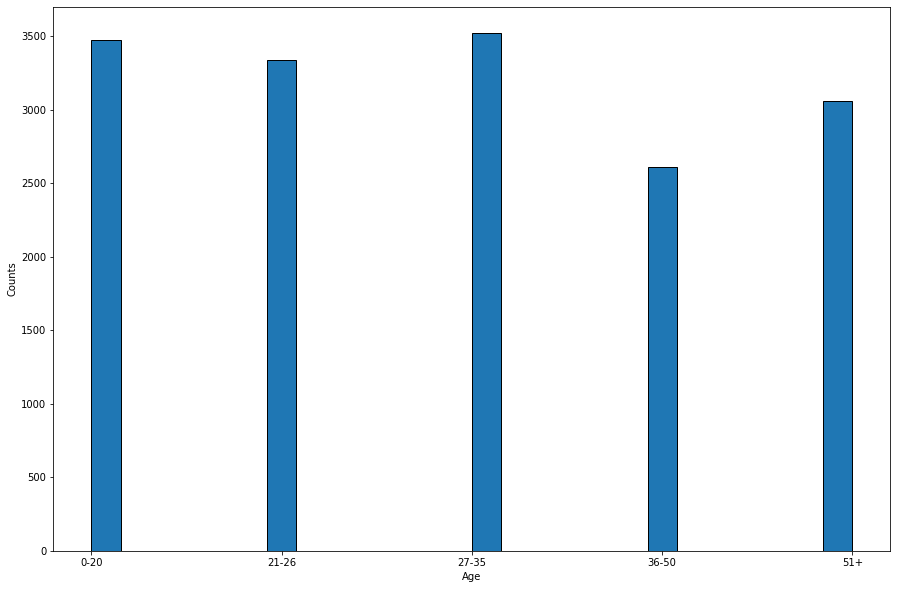

In [16]:
plot_ages(train_labels);

After binning the ages, we want to make separate folders for each classes. First, we need to get the indexes of each classes so that we can get the correct images for each class.

In [17]:
# Get indexes of each age bins
age_0_20_index = list(train_labels[train_labels['AgeRange'] == '0-20'].index)
age_21_26_index = list(train_labels[train_labels['AgeRange'] == '21-26'].index)
age_27_35_index = list(train_labels[train_labels['AgeRange'] == '27-35'].index)
age_36_50_index = list(train_labels[train_labels['AgeRange'] == '36-50'].index)
age_51_up_index = list(train_labels[train_labels['AgeRange'] == '51+'].index)

In [18]:
# With the list of indexes for each classes, we need to get the images with the indexes for each class
age_0_20_imgs = [train_imgs[index] for index in age_0_20_index]
age_21_26_imgs = [train_imgs[index] for index in age_21_26_index]
age_27_35_imgs = [train_imgs[index] for index in age_27_35_index]
age_36_50_imgs = [train_imgs[index] for index in age_36_50_index]
age_51_up_imgs = [train_imgs[index] for index in age_51_up_index]

In [19]:
# By using the function, we want to copy the images to the correct class folder
copy_image_to_new_folder(age_0_20_imgs, 'age_0_20_imgs', train_dir)
copy_image_to_new_folder(age_21_26_imgs, 'age_21_26_imgs', train_dir)
copy_image_to_new_folder(age_27_35_imgs, 'age_27_35_imgs', train_dir)
copy_image_to_new_folder(age_36_50_imgs, 'age_36_50_imgs', train_dir)
copy_image_to_new_folder(age_51_up_imgs, 'age_51_up_imgs', train_dir)

Now  we do the same process for validation and test images.

In [20]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)
validation_labels.head()

,age,AgeRange
0,54,51+
1,4,0-20
2,15,0-20
3,43,36-50
4,27,27-35


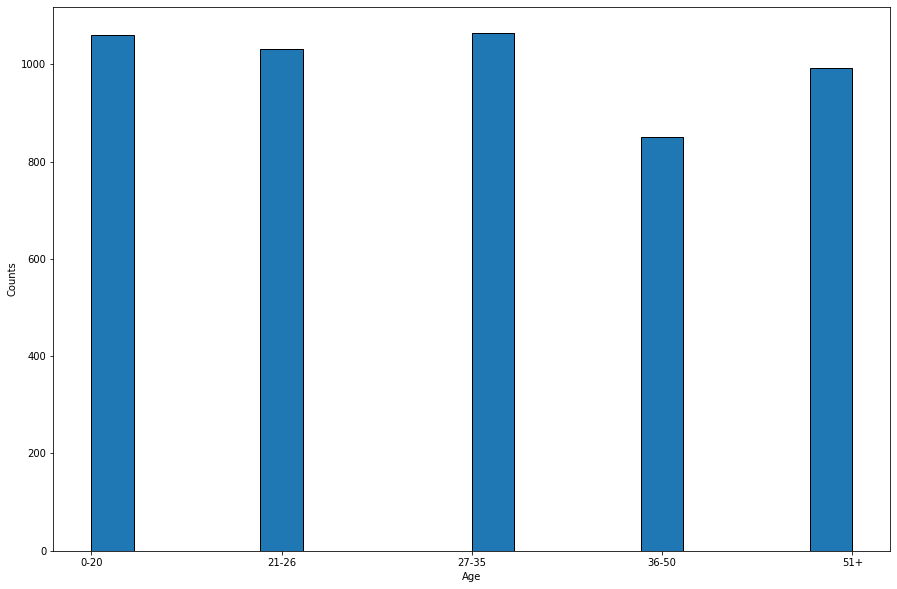

In [21]:
plot_ages(validation_labels);

The proportion of the age distributions is very similar to the training images.

In [22]:
age_0_20_index = list(validation_labels[validation_labels['AgeRange'] == '0-20'].index)
age_21_26_index = list(validation_labels[validation_labels['AgeRange'] == '21-26'].index)
age_27_35_index = list(validation_labels[validation_labels['AgeRange'] == '27-35'].index)
age_36_50_index = list(validation_labels[validation_labels['AgeRange'] == '36-50'].index)
age_51_up_index = list(validation_labels[validation_labels['AgeRange'] == '51+'].index)

age_0_20_imgs = [validation_imgs[index] for index in age_0_20_index]
age_21_26_imgs = [validation_imgs[index] for index in age_21_26_index]
age_27_35_imgs = [validation_imgs[index] for index in age_27_35_index]
age_36_50_imgs = [validation_imgs[index] for index in age_36_50_index]
age_51_up_imgs = [validation_imgs[index] for index in age_51_up_index]

copy_image_to_new_folder(age_0_20_imgs, 'age_0_20_imgs', validation_dir)
copy_image_to_new_folder(age_21_26_imgs, 'age_21_26_imgs', validation_dir)
copy_image_to_new_folder(age_27_35_imgs, 'age_27_35_imgs', validation_dir)
copy_image_to_new_folder(age_36_50_imgs, 'age_36_50_imgs', validation_dir)
copy_image_to_new_folder(age_51_up_imgs, 'age_51_up_imgs', validation_dir)

In [23]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)
test_labels.head()

,age,AgeRange
0,101,51+
1,10,0-20
2,10,0-20
3,10,0-20
4,10,0-20


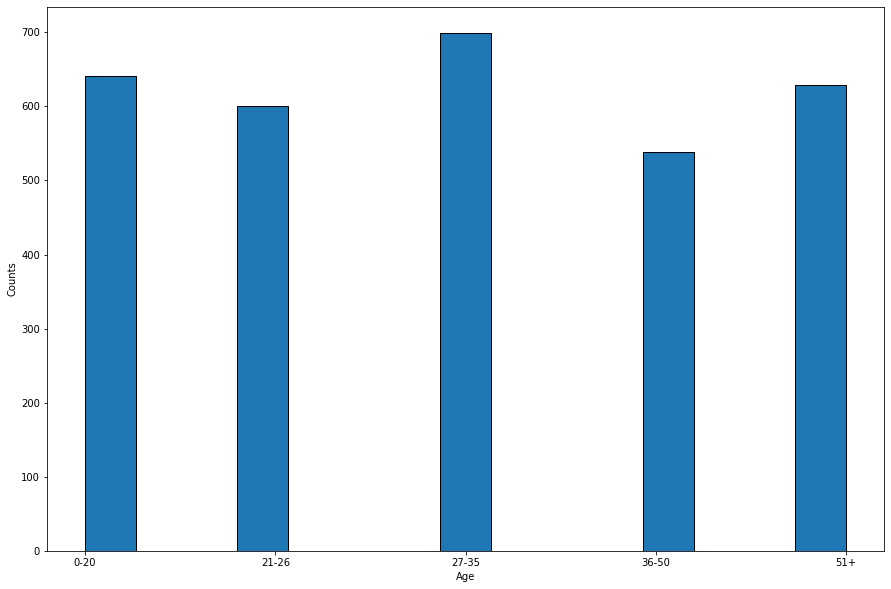

In [24]:
plot_ages(test_labels);

The proportion of the age distributions is very similar to the training images and the validation images.

In [25]:
age_0_20_index = list(test_labels[test_labels['AgeRange'] == '0-20'].index)
age_21_26_index = list(test_labels[test_labels['AgeRange'] == '21-26'].index)
age_27_35_index = list(test_labels[test_labels['AgeRange'] == '27-35'].index)
age_36_50_index = list(test_labels[test_labels['AgeRange'] == '36-50'].index)
age_51_up_index = list(test_labels[test_labels['AgeRange'] == '51+'].index)

age_0_20_imgs = [test_imgs[index] for index in age_0_20_index]
age_21_26_imgs = [test_imgs[index] for index in age_21_26_index]
age_27_35_imgs = [test_imgs[index] for index in age_27_35_index]
age_36_50_imgs = [test_imgs[index] for index in age_36_50_index]
age_51_up_imgs = [test_imgs[index] for index in age_51_up_index]

copy_image_to_new_folder(age_0_20_imgs, 'age_0_20_imgs', test_dir)
copy_image_to_new_folder(age_21_26_imgs, 'age_21_26_imgs', test_dir)
copy_image_to_new_folder(age_27_35_imgs, 'age_27_35_imgs', test_dir)
copy_image_to_new_folder(age_36_50_imgs, 'age_36_50_imgs', test_dir)
copy_image_to_new_folder(age_51_up_imgs, 'age_51_up_imgs', test_dir)

With the three models, I will iterate through multiple models in separate notebooks to find the model with the best score.